# Final Project - News categorization

## 1. Data Loading

In [1]:
import os
import numpy as np
import pandas as pd
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import re
!pip install nltk
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import digits
import string

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.layers import Embedding
import sklearn.metrics as metrics
import itertools

import nltk
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')

print("Tensorflow version " + tf.__version__)
AUTO = tf.data.experimental.AUTOTUNE

# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() 

print("REPLICAS: ", strategy.num_replicas_in_sync)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 5.9 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


D0527 06:02:48.246419379      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0527 06:02:48.246452436      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0527 06:02:48.246456010      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0527 06:02:48.246458805      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0527 06:02:48.246461474      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0527 06:02:48.246464170      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0527 06:02:48.246466802      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0527 06:02:48.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 KB 36.7 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tensorflow version 2.12.0
Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


[nltk_data] Downloading package wordnet to /root/nltk_data...


INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


In [2]:
#reviews = pd.read_json("C:/Users/fam_i/OneDrive/Colorado/ML2_unsupervised/module5/News_Category_Dataset_v3.json", lines=True)
reviews = pd.read_json("/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json", lines = True)

In [3]:
reviews.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


## 2. Exploratory Data Analysis

## (0) Data exploration

## - Check the categories: 42 categories in 209526 articles, in each category, there is not any null data.

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [5]:
print("We have a total of {} categories".format(reviews['category'].nunique()))
reviews['category'].value_counts()

We have a total of 42 categories


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

## - Concatonate 'headline' and 'short description'

In [6]:
reviews['combined_text'] = reviews['headline'] + ' ' + reviews['short_description']

## - Check the duplicate articles and remove

In [7]:
print(reviews[reviews.duplicated()])

                                                     link   
67677   https://www.huffingtonpost.comhttp://www.mothe...  \
67923   https://www.huffingtonpost.comhttp://gizmodo.c...   
70239   https://www.huffingtonpost.comhttp://www.cnbc....   
139830  https://www.huffingtonpost.comhttp://www.cnn.c...   
144409  https://www.huffingtonpost.comhttp://www.upwor...   
145142  https://www.huffingtonpost.comhttp://www.weath...   
178155  https://www.huffingtonpost.comhttp://www.busin...   
187329  https://www.huffingtonpost.comhttp://www.nytim...   
194596  https://www.huffingtonpost.comhttp://blogs.wsj...   
194598  https://www.huffingtonpost.comhttp://www.theda...   
207122  https://www.huffingtonpost.comhttp://d.repubbl...   
207208  https://www.huffingtonpost.comhttp://d.repubbl...   
207318  https://www.huffingtonpost.comhttp://d.repubbl...   

                                                 headline        category   
67677   On Facebook, Trump's Longtime Butler Calls For...        POL

In [8]:
reviews.drop_duplicates(inplace=True)

In [9]:
reviews.duplicated().sum()

0

## - Check the histogram of each category 

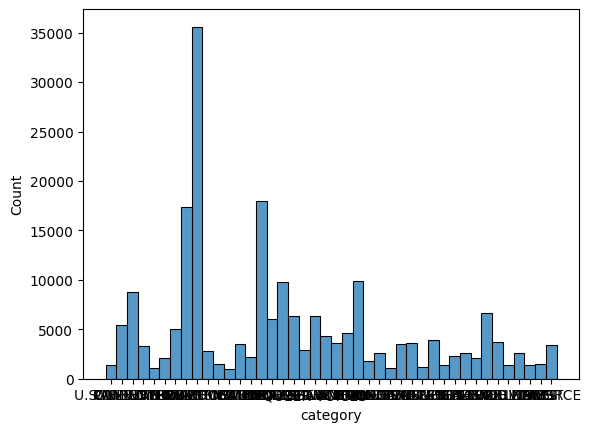

In [10]:
sns.histplot(reviews.category)
plt.show()

[Text(0, 0, 'POLITICS'),
 Text(1, 0, 'WELLNESS'),
 Text(2, 0, 'ENTERTAINMENT'),
 Text(3, 0, 'TRAVEL'),
 Text(4, 0, 'STYLE & BEAUTY'),
 Text(5, 0, 'PARENTING'),
 Text(6, 0, 'HEALTHY LIVING'),
 Text(7, 0, 'QUEER VOICES'),
 Text(8, 0, 'FOOD & DRINK'),
 Text(9, 0, 'BUSINESS'),
 Text(10, 0, 'COMEDY'),
 Text(11, 0, 'SPORTS'),
 Text(12, 0, 'BLACK VOICES'),
 Text(13, 0, 'HOME & LIVING'),
 Text(14, 0, 'PARENTS'),
 Text(15, 0, 'THE WORLDPOST'),
 Text(16, 0, 'WEDDINGS'),
 Text(17, 0, 'WOMEN'),
 Text(18, 0, 'CRIME'),
 Text(19, 0, 'IMPACT'),
 Text(20, 0, 'DIVORCE'),
 Text(21, 0, 'WORLD NEWS'),
 Text(22, 0, 'MEDIA'),
 Text(23, 0, 'WEIRD NEWS'),
 Text(24, 0, 'GREEN'),
 Text(25, 0, 'WORLDPOST'),
 Text(26, 0, 'RELIGION'),
 Text(27, 0, 'STYLE'),
 Text(28, 0, 'SCIENCE'),
 Text(29, 0, 'TECH'),
 Text(30, 0, 'TASTE'),
 Text(31, 0, 'MONEY'),
 Text(32, 0, 'ARTS'),
 Text(33, 0, 'ENVIRONMENT'),
 Text(34, 0, 'FIFTY'),
 Text(35, 0, 'GOOD NEWS'),
 Text(36, 0, 'U.S. NEWS'),
 Text(37, 0, 'ARTS & CULTURE'),
 Text(38,

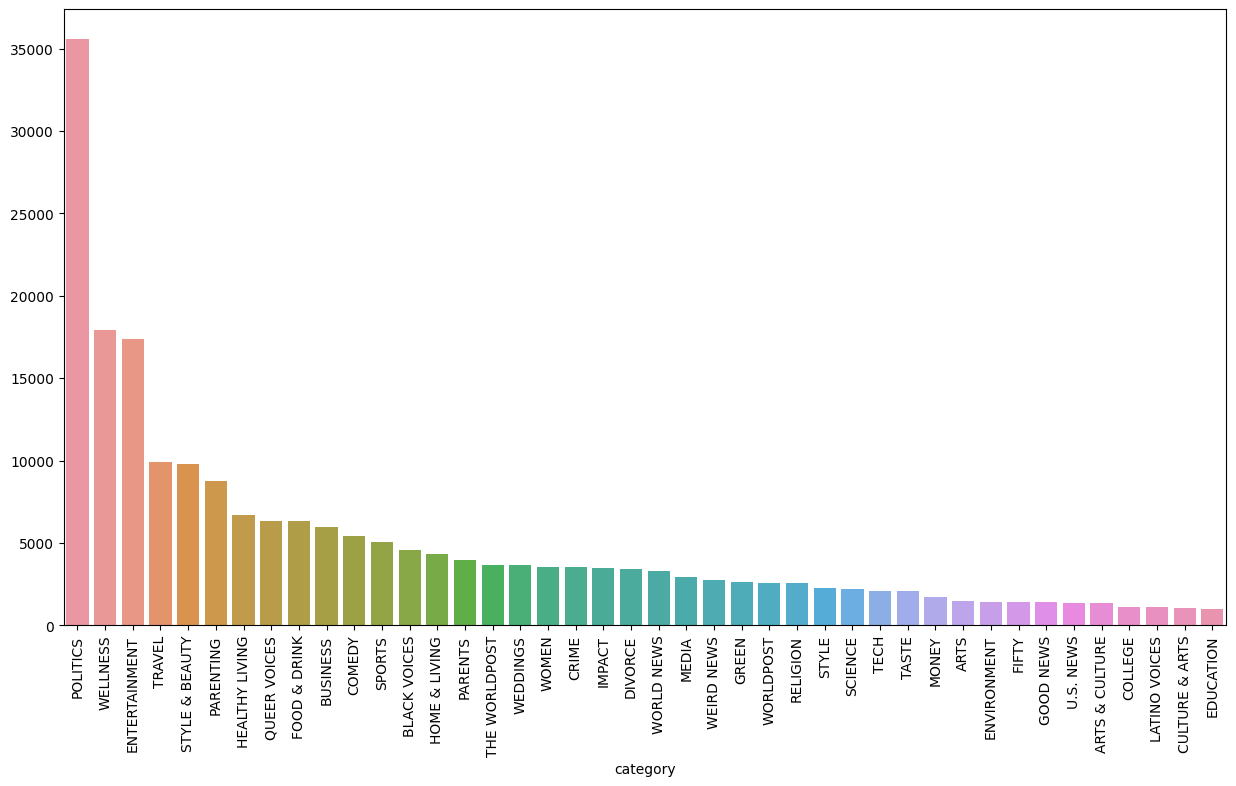

In [11]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=reviews["category"].value_counts().index, y=reviews["category"].value_counts().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## - Group the categories

In [12]:
def grouping(dataset, lst, name):
    for category in reviews['category'].value_counts().index:
        if category in lst:
            dataset.loc[dataset['category'] == category, 'category'] = name
            
grouping(reviews, lst=['WELLNESS', 'HEALTHY LIVING', 'HOME & LIVING', 'STYLE & BEAUTY', 'STYLE'], name = 'LIFE & WELLNESS')
grouping(reviews, lst=['PARENTING', 'PARENTS', 'EDUCATION', 'COLLEGE'], name = 'PARENTING & EDUCATION')
grouping(reviews, lst=['SPORTS', 'ENTERTAINMENT', 'COMEDY','WEIRD NEWS', 'ARTS'], name='SPORTS & ENTERTAINMENT')
grouping(reviews, lst=['TRAVEL', 'ARTS & CULTURE', 'CULTURE & ARTS', 'FOOD & DRINK', 'TASTE'], name = 'TRAVEL & ART')
grouping(reviews, lst=['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name = 'EMPOWERED VOICES')
grouping(reviews, lst= ['BUSINESS', 'MONEY'] , name = 'BUSINESS & MONEY')
grouping(reviews, lst= ['THE WORLDPOST', 'WORLDPOST', 'WORLD NEWS'], name = 'WORLDNEWS')
grouping(reviews, lst= ['ENVIRONMENT','GREEN'], name = 'ENVIRONMENT')
grouping(reviews, lst= ['TECH', 'SCIENCE'], name = 'SCIENCE & TECH')
grouping(reviews, lst= ['FIFTY', 'IMPACT', 'GOOD NEWS','CRIME', 'U.S. NEWS'], name =  'GENERAL')
grouping(reviews, lst= ['WEDDINGS', 'DIVORCE', 'RELIGION','MEDIA'], name =  'MISC')

[Text(0, 0, 'LIFE & WELLNESS'),
 Text(1, 0, 'POLITICS'),
 Text(2, 0, 'SPORTS & ENTERTAINMENT'),
 Text(3, 0, 'TRAVEL & ART'),
 Text(4, 0, 'EMPOWERED VOICES'),
 Text(5, 0, 'PARENTING & EDUCATION'),
 Text(6, 0, 'MISC'),
 Text(7, 0, 'GENERAL'),
 Text(8, 0, 'WORLDNEWS'),
 Text(9, 0, 'BUSINESS & MONEY'),
 Text(10, 0, 'SCIENCE & TECH'),
 Text(11, 0, 'ENVIRONMENT')]

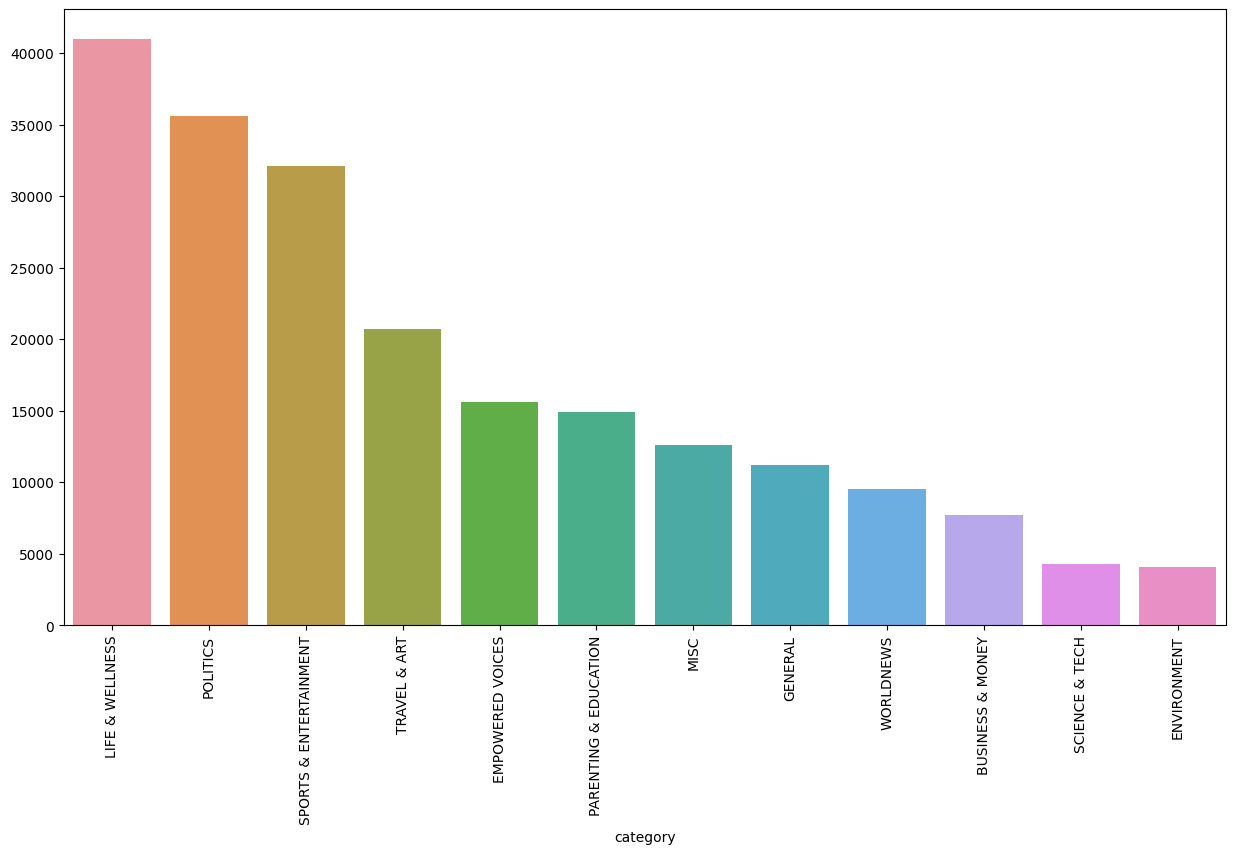

In [13]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=reviews["category"].value_counts().index, y=reviews["category"].value_counts().values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

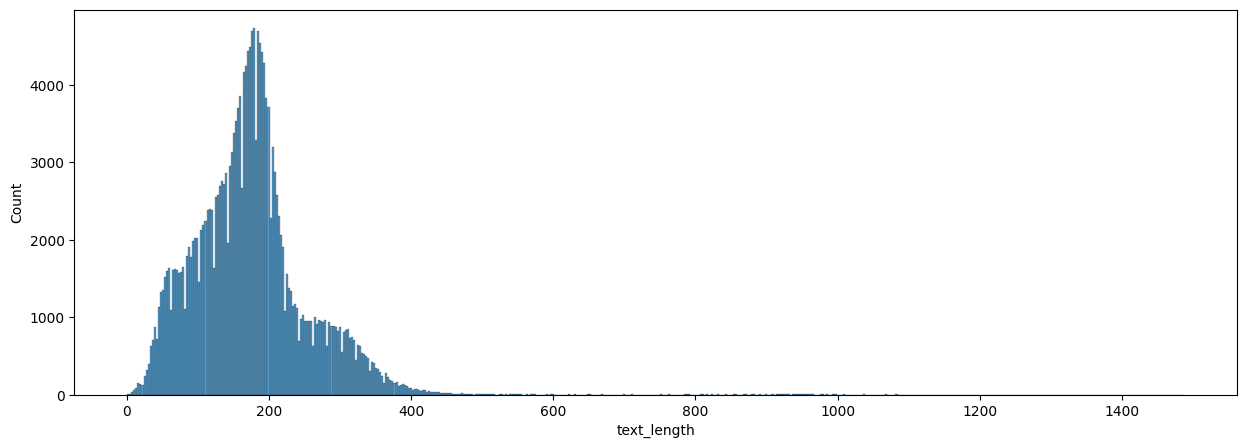

In [14]:
reviews['text_length'] = reviews.combined_text.apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(reviews.text_length)
plt.show()


## (1) Cleaning Text

In [15]:
## remove punctuation & Case normalization

def clean_text(df):
    stop_words = stopwords.words('english')
    df['no_punctuation'] = df['combined_text'].apply(lambda row: re.sub(r'[^\w\s]+', '', row))
    df['no_number'] = df['no_punctuation'].apply(lambda row: re.sub(r'[0-9]+', '', row))
    df['clean_text'] = df['no_number'].apply(lambda x : ' '.join([i for i in x.split() if i.lower() not in (stop_words)]))
    return

clean_text(reviews)
reviews

,link,headline,category,short_description,authors,date,combined_text,text_length,no_punctuation,no_number,clean_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,GENERAL,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...,231,Over 4 Million Americans Roll Up Sleeves For O...,Over Million Americans Roll Up Sleeves For Om...,Million Americans Roll Sleeves OmicronTargeted...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",GENERAL,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li...",249,American Airlines Flyer Charged Banned For Lif...,American Airlines Flyer Charged Banned For Lif...,American Airlines Flyer Charged Banned Life Pu...
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,SPORTS & ENTERTAINMENT,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...,134,23 Of The Funniest Tweets About Cats And Dogs ...,Of The Funniest Tweets About Cats And Dogs Th...,Funniest Tweets Cats Dogs Week Sept dog dont u...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING & EDUCATION,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...,216,The Funniest Tweets From Parents This Week Sep...,The Funniest Tweets From Parents This Week Sep...,Funniest Tweets Parents Week Sept Accidentally...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,GENERAL,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...,234,Woman Who Called Cops On Black BirdWatcher Los...,Woman Who Called Cops On Black BirdWatcher Los...,Woman Called Cops Black BirdWatcher Loses Laws...
...,...,...,...,...,...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,183,RIM CEO Thorsten Heins Significant Plans For B...,RIM CEO Thorsten Heins Significant Plans For B...,RIM CEO Thorsten Heins Significant Plans Black...
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS & ENTERTAINMENT,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,192,Maria Sharapova Stunned By Victoria Azarenka I...,Maria Sharapova Stunned By Victoria Azarenka I...,Maria Sharapova Stunned Victoria Azarenka Aust...
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS & ENTERTAINMENT,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",221,Giants Over Patriots Jets Over Colts Among Mo...,Giants Over Patriots Jets Over Colts Among Mo...,Giants Patriots Jets Colts Among Improbable Su...
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS & ENTERTAINMENT,CORRECTION: An earlier version of this story i...,,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,174,Aldon Smith Arrested 49ers Linebacker Busted F...,Aldon Smith Arrested ers Linebacker Busted For...,Aldon Smith Arrested ers Linebacker Busted DUI...


In [16]:
reviews = reviews.reset_index(drop=True)
reviews['clean_text'][0]

'Million Americans Roll Sleeves OmicronTargeted COVID Boosters Health experts said early predict whether demand would match million doses new boosters US ordered fall'

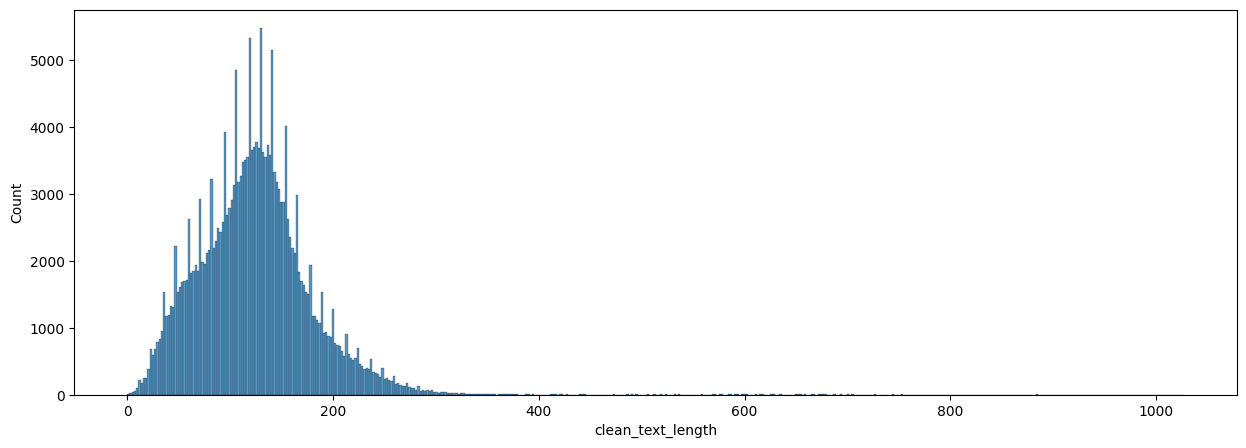

In [17]:
reviews["clean_text_length"] = reviews.clean_text.apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(reviews.clean_text_length)
plt.show()

## (2) Removing outliners

In [18]:
len(reviews[reviews["clean_text_length"]>400])

227

In [19]:
reviews = reviews[reviews['clean_text_length'] < 400]
len(reviews)

209287

## (3) Tokenizing and Padding

In [20]:
review_df = reviews.copy()

In [21]:
X, y = reviews['clean_text'], reviews['category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=39)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=39)

In [22]:
vocab_size=20000
max_length=150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [23]:
X_train

179969    Things Learned Washingtons First Day Marriage ...
106060                          Kanyes New Album Gets Title
53424     Meet Muslim Woman Running State Legislature Mi...
35927     Signing Day Future Superstars Education become...
107950    Rolling Stone Editor Comments Brian Williams S...
                                ...                        
31302     ExxonMobil Talks Good Game Still Funding Clima...
121882          Isaiah Cooper Shares Life Appalachian Trail
165126    Two Uncomfortable Truths New Merida Looks Litt...
204041    Coal Miners Daughter Chinese Style Media Rips ...
60809     Hillary Clinton Accept Historic Nomination Pre...
Name: clean_text, Length: 167429, dtype: object

In [24]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_train = np.asarray(y_train)
y_train = pd.get_dummies(y_train)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_val = np.asarray(y_val)
y_val = pd.get_dummies(y_val)

train_set = np.array(X_train)
val_set = np.array(X_val)

train_label = np.array(y_train)
val_label = np.array(y_val)


y_test = pd.get_dummies(y_test)
y_test = np.asarray(y_test)
y_test = np.argmax(y_test,axis=1)   #this would be our ground truth label while testing

print(train_set.shape)
print(train_label.shape)

print(val_set.shape)
print(val_label.shape)

(167429, 150)
(167429, 12)
(20929, 150)
(20929, 12)


## (4) Embedding matrix for model


In [25]:
## https://www.kaggle.com/datasets/anindya2906/glove6b
path_to_glove100_file = '/kaggle/input/glove6b/glove.6B.100d.txt'
#path_to_glove100_file = 'C:/Users/fam_i/Downloads/glove.6B/glove.6B.100d.txt'

In [26]:
#Initialising the embedding matrix with glove vec embeddings

num_tokens = len(tokenizer.word_index.items()) + 2
embedding_dim = 100
hits = 0
misses = 0


embeddings_index = {}
with open(path_to_glove100_file, encoding="utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 67199 words (32158 misses)


# 3. Modelling

## (1) Baseline model with SimpleRNN
### Recurrent Neural Networks are designed to work with sequence data, and use the previous information in the sequence to produce the current output.

In [27]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                            patience=3, min_delta=0.0001)

embedding_layer = Embedding(num_tokens, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                            mask_zero=True,input_shape=[None],trainable=False)

tf.keras.backend.clear_session()
embed_size = 100
model0 = keras.models.Sequential([
        embedding_layer,
        keras.layers.Bidirectional(keras.layers.SimpleRNN(64, dropout = 0.1, recurrent_dropout = 0.2, activation = 'tanh', return_sequences=True)),
        keras.layers.Bidirectional(keras.layers.SimpleRNN(64, dropout = 0.1, recurrent_dropout = 0.3, activation = 'tanh', return_sequences=True)),
        keras.layers.SimpleRNN(32, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(12, activation="softmax")
        ])


model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         9935900   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        21120     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        24704     
 nal)                                                            
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 12)                3

In [28]:
tf.keras.backend.clear_session()
embed_size = 100

opt = keras.optimizers.Adam(learning_rate=0.001)
model0.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model0.fit( train_set,train_label,
                     batch_size = 32,
                     steps_per_epoch=len(X_train) // 32, 
                     validation_data = (val_set , val_label),
                     validation_steps = len(val_set)//32, epochs=20,
                     callbacks=  early_stop )

Epoch 1/20
5232/5232 [==============================] - 904s 171ms/step - loss: 1.7769 - accuracy: 0.4399 - val_loss: 1.6428 - val_accuracy: 0.4860
Epoch 2/20
5232/5232 [==============================] - 893s 171ms/step - loss: 1.6940 - accuracy: 0.4655 - val_loss: 1.6559 - val_accuracy: 0.4768
Epoch 3/20
5232/5232 [==============================] - 890s 170ms/step - loss: 1.6995 - accuracy: 0.4610 - val_loss: 1.6787 - val_accuracy: 0.4775
Epoch 4/20
5232/5232 [==============================] - 888s 170ms/step - loss: 1.6829 - accuracy: 0.4696 - val_loss: 1.6083 - val_accuracy: 0.4933
Epoch 5/20
5232/5232 [==============================] - 887s 170ms/step - loss: 1.6863 - accuracy: 0.4675 - val_loss: 1.7298 - val_accuracy: 0.4331
Epoch 6/20
5232/5232 [==============================] - 882s 169ms/step - loss: 1.7021 - accuracy: 0.4669 - val_loss: 1.6603 - val_accuracy: 0.4831
Epoch 7/20
5232/5232 [==============================] - 883s 169ms/step - loss: 1.7207 - accuracy: 0.4548 - val_

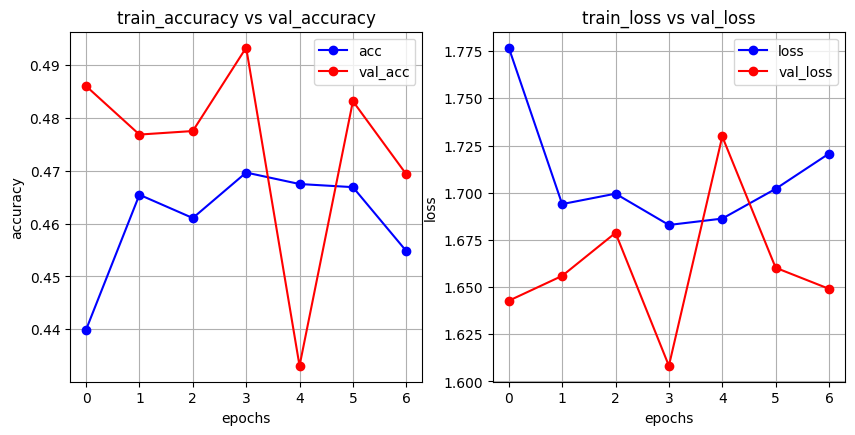

In [29]:
fig = plt.figure(figsize=(10,10))

# Plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo-', label = "acc")
plt.plot(history.history['val_accuracy'], 'ro-', label = "val_acc")
plt.title("train_accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'],'bo-', label = "loss")
plt.plot(history.history['val_loss'], 'ro-', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

## - Evaluation & predictions

In [30]:
classes = reviews['category'].value_counts().index

def prediction(model, inference_data):
    X = tokenizer.texts_to_sequences(inference_data)
    X = pad_sequences(X,maxlen= max_length,padding=padding_type, truncating=trunc_type)
    pred = model.predict(X)
    pred_value = tf.argmax(pred,axis =1).numpy()                
    return pred_value

655/655 [==============================] - 27s 41ms/step
              precision    recall  f1-score   support

           0       0.44      0.05      0.08       779
           1       0.24      0.05      0.09      1597
           2       0.14      0.01      0.02       442
           3       0.21      0.02      0.03      1122
           4       0.46      0.69      0.55      4061
           5       0.23      0.01      0.01      1309
           6       0.36      0.35      0.35      1478
           7       0.52      0.79      0.62      3387
           8       0.24      0.02      0.04       432
           9       0.52      0.58      0.55      3341
          10       0.48      0.59      0.53      2029
          11       0.35      0.53      0.42       952

    accuracy                           0.47     20929
   macro avg       0.35      0.31      0.27     20929
weighted avg       0.41      0.47      0.40     20929



Text(0.5, 1.0, 'Confusion matrix of model')

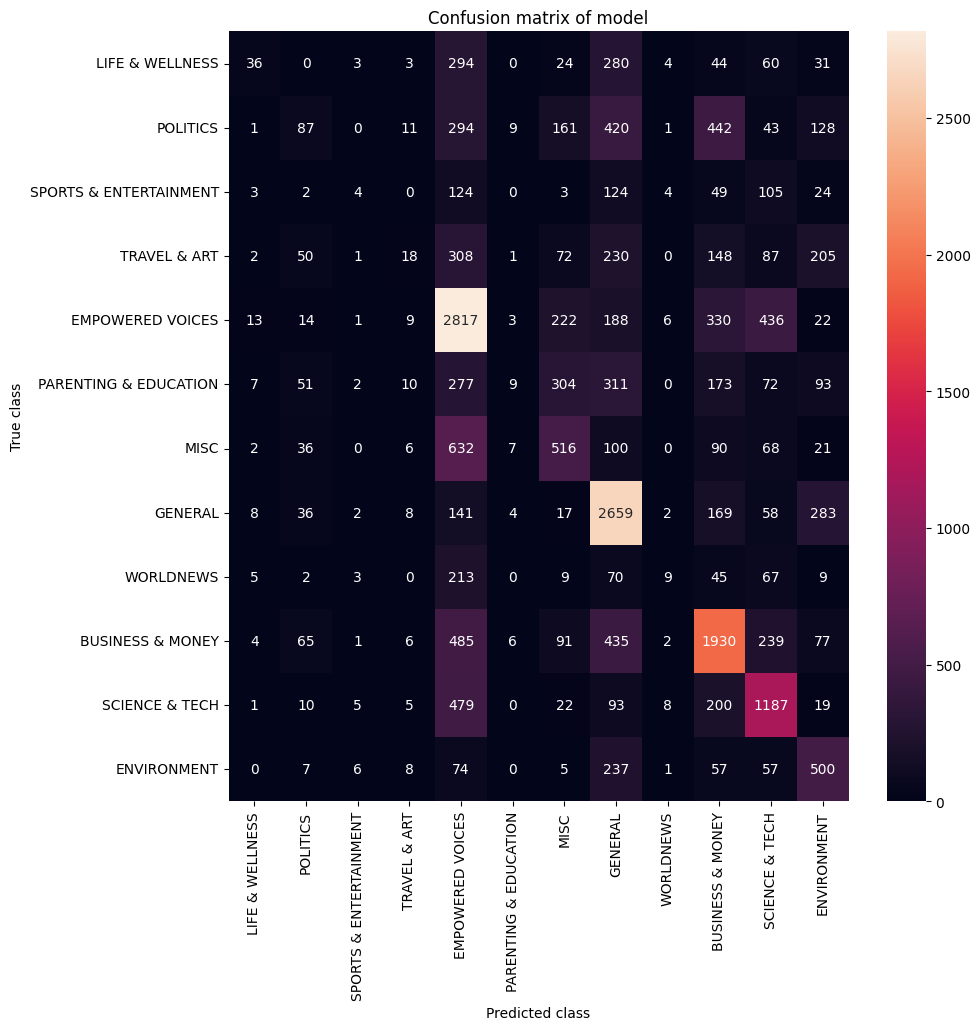

In [33]:
y_pred = prediction(model0, X_test)
print(classification_report(np.asarray(y_test),np.asarray( y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix, xticklabels=classes,
                      yticklabels=classes,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

## (2) Bidirectional GRU + CONV
### The workflow of Gated Recurrent Units is the same as RNN but the difference is in the operations inside the unit: reset gate & update gate, in order to overcome vanishing gradient.

In [34]:
tf.keras.backend.clear_session()
embed_size = 100

model1 = keras.models.Sequential([
        embedding_layer,
        keras.layers.SpatialDropout1D(0.2),
        keras.layers.Bidirectional(keras.layers.GRU(128, return_sequences = True, dropout = 0.1, recurrent_dropout=0.1)),
        keras.layers.Conv1D(64, kernel_size=3),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(12, activation="softmax")
            
        ])


model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         9935900   
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 100)        0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, None, 256)        176640    
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, None, 64)          49216     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                        

In [35]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model1.fit( train_set,train_label,
                     batch_size = 32,
                     steps_per_epoch=len(X_train) // 32, 
                     validation_data = (val_set , val_label),
                     validation_steps = len(val_set)//32, epochs=20,
                     callbacks=  early_stop )

Epoch 1/20
5232/5232 [==============================] - 884s 168ms/step - loss: 1.2818 - accuracy: 0.6021 - val_loss: 1.0961 - val_accuracy: 0.6588
Epoch 2/20
5232/5232 [==============================] - 885s 169ms/step - loss: 1.1117 - accuracy: 0.6518 - val_loss: 1.0296 - val_accuracy: 0.6783
Epoch 3/20
5232/5232 [==============================] - 872s 167ms/step - loss: 1.0579 - accuracy: 0.6681 - val_loss: 1.0097 - val_accuracy: 0.6875
Epoch 4/20
5232/5232 [==============================] - 879s 168ms/step - loss: 1.0202 - accuracy: 0.6775 - val_loss: 0.9937 - val_accuracy: 0.6893
Epoch 5/20
5232/5232 [==============================] - 882s 169ms/step - loss: 0.9982 - accuracy: 0.6840 - val_loss: 0.9726 - val_accuracy: 0.6968
Epoch 6/20
5232/5232 [==============================] - 877s 168ms/step - loss: 0.9808 - accuracy: 0.6889 - val_loss: 0.9842 - val_accuracy: 0.6930
Epoch 7/20
5232/5232 [==============================] - 878s 168ms/step - loss: 0.9665 - accuracy: 0.6922 - val_

## - Evaluation & predictions

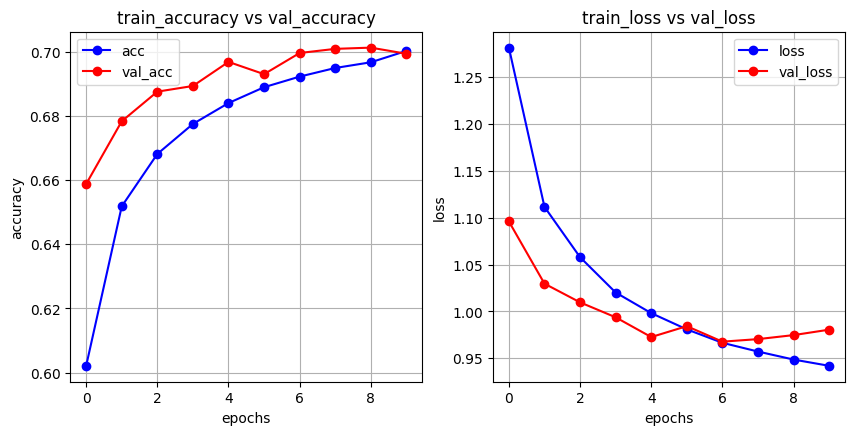

In [36]:
fig = plt.figure(figsize=(10,10))

# Plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo-', label = "acc")
plt.plot(history.history['val_accuracy'], 'ro-', label = "val_acc")
plt.title("train_accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'],'bo-', label = "loss")
plt.plot(history.history['val_loss'], 'ro-', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

655/655 [==============================] - 28s 42ms/step
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       779
           1       0.64      0.47      0.54      1597
           2       0.54      0.52      0.53       442
           3       0.56      0.33      0.41      1122
           4       0.72      0.83      0.77      4061
           5       0.71      0.64      0.67      1309
           6       0.64      0.74      0.69      1478
           7       0.76      0.81      0.78      3387
           8       0.70      0.41      0.52       432
           9       0.66      0.77      0.71      3341
          10       0.77      0.74      0.75      2029
          11       0.74      0.63      0.68       952

    accuracy                           0.70     20929
   macro avg       0.67      0.61      0.63     20929
weighted avg       0.69      0.70      0.69     20929



Text(0.5, 1.0, 'Confusion matrix of model')

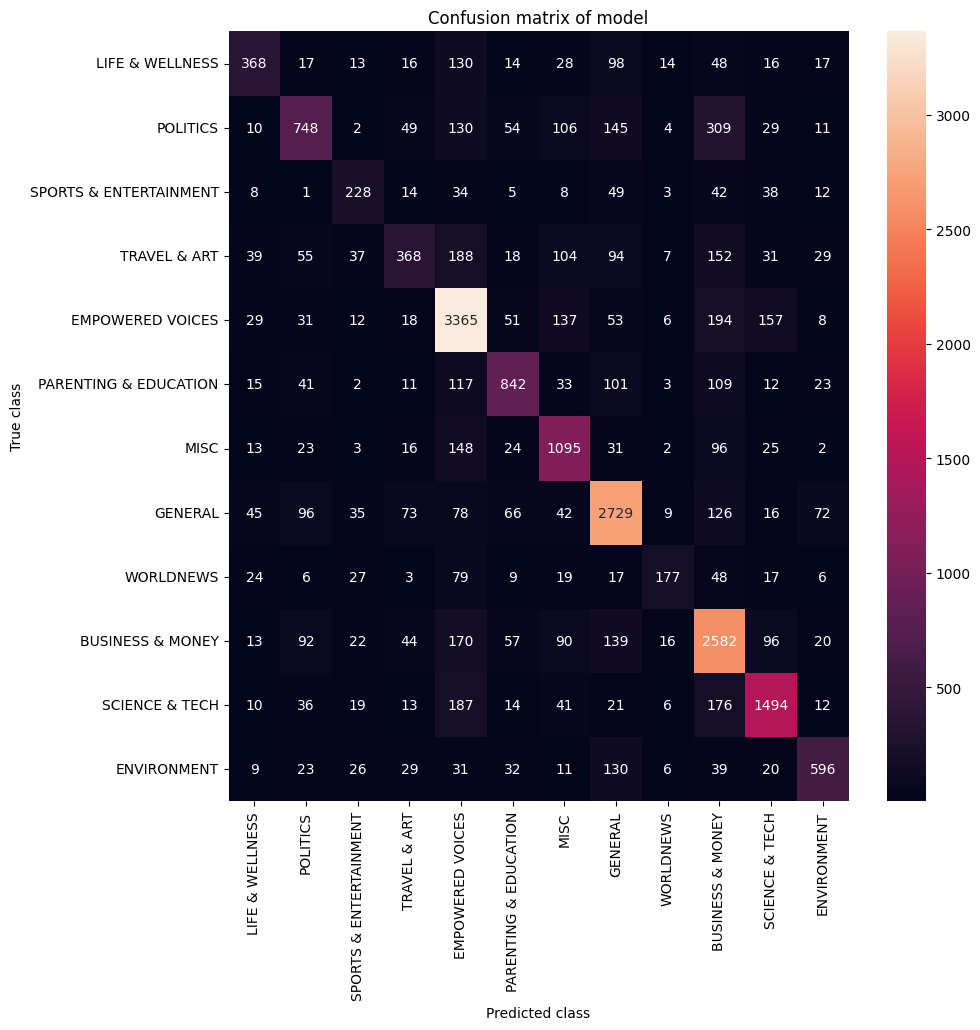

In [39]:
y_pred = prediction(model1, X_test)
print(classification_report(np.asarray(y_test),np.asarray( y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix, xticklabels=classes,
                      yticklabels=classes,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

## (3) LSTM

### Long Short-Term Memory’s architecture is similar to GRU’s, which adds 2 more gates: forget gate & output gate, in order to overcome vanishing gradients.

In [40]:
tf.keras.backend.clear_session()
embed_size = 100

model2 = keras.models.Sequential([
        embedding_layer,
        keras.layers.Bidirectional(keras.layers.LSTM(256, dropout = 0.4)),
        keras.layers.Dense(12, activation="softmax")
            
        ])


model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         9935900   
                                                                 
 bidirectional (Bidirectiona  (None, 512)              731136    
 l)                                                              
                                                                 
 dense (Dense)               (None, 12)                6156      
                                                                 
Total params: 10,673,192
Trainable params: 737,292
Non-trainable params: 9,935,900
_________________________________________________________________


In [41]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model2.fit( train_set,train_label,
                     batch_size = 32,
                     steps_per_epoch=len(X_train) // 32, 
                     validation_data = (val_set , val_label),
                     validation_steps = len(val_set)//32, epochs=20,
                     callbacks=  early_stop )

Epoch 1/20
5232/5232 [==============================] - 1594s 303ms/step - loss: 1.1640 - accuracy: 0.6268 - val_loss: 0.9890 - val_accuracy: 0.6848
Epoch 2/20
5232/5232 [==============================] - 1582s 302ms/step - loss: 0.9989 - accuracy: 0.6780 - val_loss: 0.9317 - val_accuracy: 0.7014
Epoch 3/20
5232/5232 [==============================] - 1582s 302ms/step - loss: 0.9367 - accuracy: 0.6957 - val_loss: 0.9040 - val_accuracy: 0.7086
Epoch 4/20
5232/5232 [==============================] - 1582s 302ms/step - loss: 0.8903 - accuracy: 0.7093 - val_loss: 0.8941 - val_accuracy: 0.7135
Epoch 5/20
5232/5232 [==============================] - 1582s 302ms/step - loss: 0.8585 - accuracy: 0.7177 - val_loss: 0.8897 - val_accuracy: 0.7163
Epoch 6/20
5232/5232 [==============================] - 1582s 302ms/step - loss: 0.8294 - accuracy: 0.7273 - val_loss: 0.8859 - val_accuracy: 0.7178
Epoch 7/20
5232/5232 [==============================] - 1582s 302ms/step - loss: 0.8087 - accuracy: 0.7333

## - Evaluation & predictions

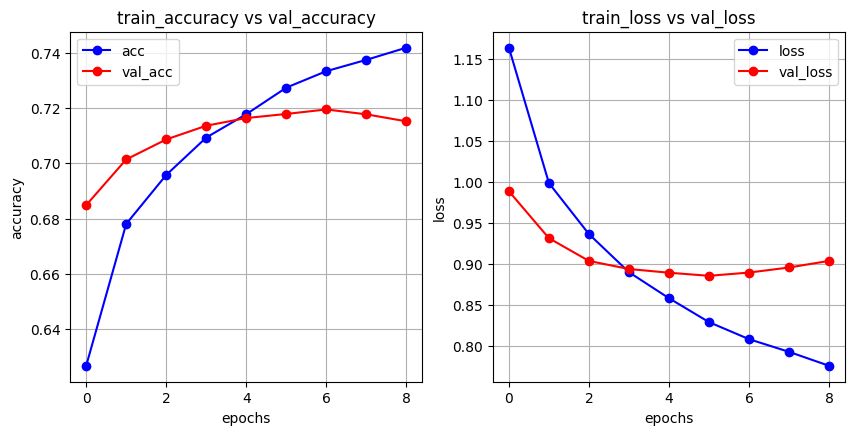

In [43]:
fig = plt.figure(figsize=(10,10))

# Plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo-', label = "acc")
plt.plot(history.history['val_accuracy'], 'ro-', label = "val_acc")
plt.title("train_accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'],'bo-', label = "loss")
plt.plot(history.history['val_loss'], 'ro-', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

655/655 [==============================] - 68s 104ms/step
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       779
           1       0.63      0.49      0.55      1597
           2       0.55      0.55      0.55       442
           3       0.55      0.36      0.43      1122
           4       0.76      0.83      0.79      4061
           5       0.75      0.64      0.69      1309
           6       0.61      0.81      0.69      1478
           7       0.80      0.78      0.79      3387
           8       0.58      0.51      0.55       432
           9       0.73      0.73      0.73      3341
          10       0.74      0.81      0.77      2029
          11       0.73      0.72      0.73       952

    accuracy                           0.71     20929
   macro avg       0.67      0.65      0.66     20929
weighted avg       0.71      0.71      0.71     20929



Text(0.5, 1.0, 'Confusion matrix of model')

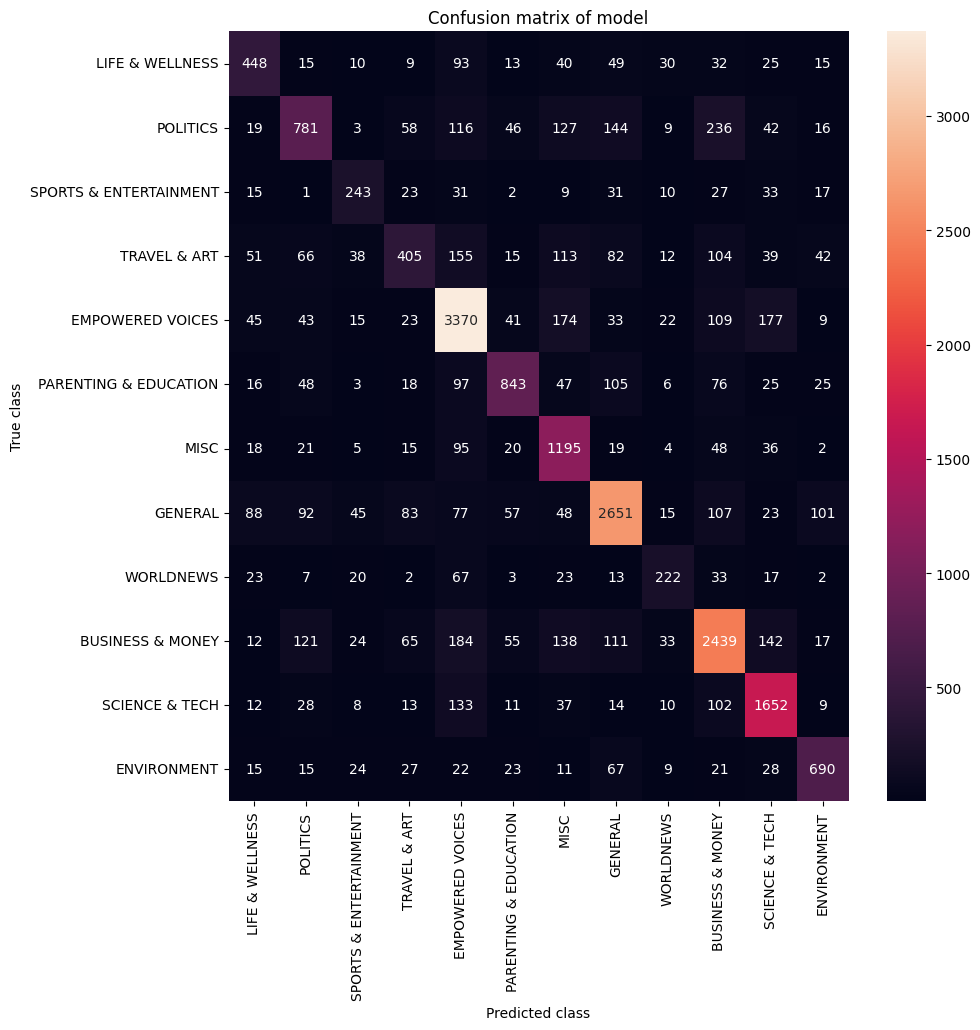

In [45]:
y_pred = prediction(model2, X_test)
print(classification_report(np.asarray(y_test),np.asarray( y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix, xticklabels=classes,
                      yticklabels=classes,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

# 4. Analysis

## - Among 3 models (SimpleRNN, GRU, LSTM), accuracy of LSTM is the best: 0.71
## - It would be observed that the accuracy order such as LSTM > GRU > SimpleRNN would be reflected by the effect of memory for overcoming vanishing gradients.
## - In-detail observation of confusion matrix of the RNN model would show that several combination of categories has the bad result.


# 5. Conclusion

## Reference
### https://www.kaggle.com/datasets/rmisra/news-category-dataset
### Misra, Rishabh. "News Category Dataset." arXiv preprint arXiv:2209.11429 (2022).
### Misra, Rishabh and Jigyasa Grover. "Sculpting Data for ML: The first act of Machine Learning." ISBN 9798585463570 (2021).
### https://medium.com/computronium/recurrent-models-overview
### https://www.kaggle.com/code/derinrobert/newsclassification-using-lstm-val-acc-72